   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


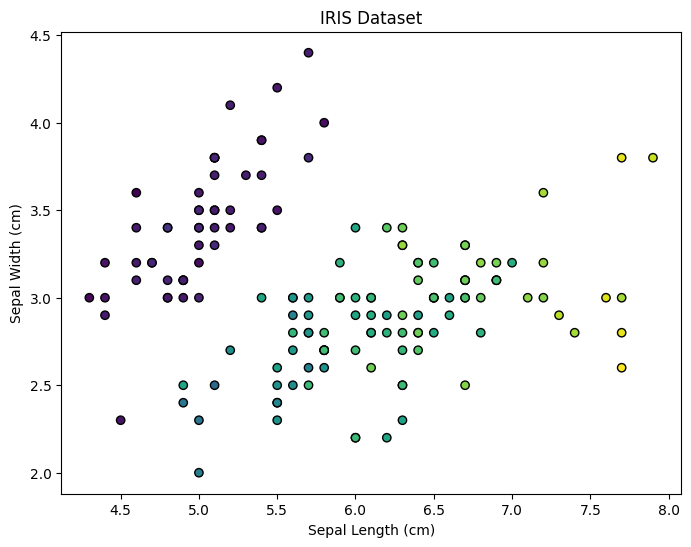

C:\Users\hp\AppData\Local\Temp\ipykernel_1556\1741255070.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance += np.square(data1[x] - data2[x])


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [33]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Importing data
file_path = r"C:\Users\hp\Downloads\Iris.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
print(data.head(5))

# Function to calculate Euclidean distance
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# KNN model
def knn(trainingSet, testInstance, k):
    distances = {}
    length = len(testInstance)  # Use len to get the number of columns
    
    # Calculating Euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]
    
    # Sorting distances
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    
    neighbors = []
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    
    classVotes = {}
    # Calculating the most frequent class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    
    # Sorting the class votes
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0], neighbors

# Plot the dataset (scatter plot for two features)
plt.figure(figsize=(8, 6))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data['PetalLengthCm'], cmap='viridis', edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('IRIS Dataset')
plt.show()

# Split the dataset into training and test sets
train, test = train_test_split(data, test_size=0.3, random_state=42)

# Initialize k values
k_values = [1, 3, 5]

# Lists to store accuracy values
accuracy_scores = []

# Loop over different values of k
for k in k_values:
    predictions = []
    # Make predictions for each test instance
    for i in range(len(test)):
        result, _ = knn(train, test.iloc[i], k)
        predictions.append(result)
    
    # Convert 'Species' column to list for accurate comparison
    true_labels = test['Species'].tolist()
    
    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    accuracy_scores.append(accuracy)
    
    # Print predictions for the first few test instances
    print(f'Predictions for k={k}: {predictions[:5]}')

# Plot accuracy vs. k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k value for KNN')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
